# KNN

In [93]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

In [228]:
iris = load_iris()
X = iris.data
y = iris.target

In [229]:
X = X[:,0:3:2]
data = np.c_[X,y]

## Vrai données

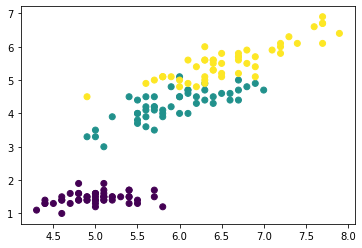

In [230]:
plt.scatter(data[:,0], data[:,1], c=data[:,-1]);

## KNN de Sklearn

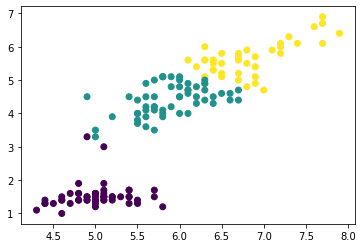

In [292]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X,y)
predict = knn.predict(X)

plt.scatter(data[:,0], data[:,1], c=predict);

## KNN Implémentation

In [258]:
X.shape

(150, 2)

In [306]:
def KNN(X,y, n_neighbours=3):
    """
    Algorithme de clustering : K-nearest neighbours
    """
    
    X_ = np.c_[X,y]
    predict_label = np.zeros(X_.shape[0])

    for number, line in enumerate(X_):
        new_array = np.delete(X_, number, axis=0)
        dist = np.zeros((new_array.shape[0],2))
        
        for n_line, element in enumerate(new_array):
            dist[n_line,0] = np.linalg.norm(line[:-1] - element[:-1])
            dist[n_line,1] = element[-1]
        
        dist = dist[dist[:,0].argsort()]
        dist = dist[:n_neighbours]
        
        re
        if (n_neighbours % 2 != 0):
            predict_label[number] = mode(dist[:,1]).mode
            
        else :
            predict_label[number] = mode(dist[:,1]).mode
            print(predict_label[number])
    
    return predict_label

In [307]:
predict_lab = KNN(X,y, n_neighbours=80)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
2.0
1.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
1.0
2.0
1.0
2.0
1.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
1.0
2.0
2.0
1.0


In [287]:
mode(y)

ModeResult(mode=array([0]), count=array([50]))

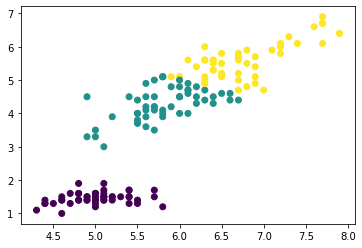

In [290]:
plt.scatter(data[:,0], data[:,1], c=predict_lab);

In [241]:
(predict_lab == data[:,-1]).sum() / 150

0.9466666666666667

In [245]:
(predict_lab == predict).sum() / 150

0.9666666666666667

In [243]:
knn.score(X,y)

0.9533333333333334

In [319]:
m0 = np.mean(X[y==0], axis=0)
m1 = np.mean(X[y==1], axis=0)

In [335]:
d0 = sum((X - m0)**2)
d1 = sum((X - m1)**2)

d = np.vstack([d0,d1])
d
np.argmin(d,axis=1)

array([0, 0])